In [1]:
import pandas as pd

In [2]:
!ls

Äldre versioner exjobb	Johanna exjobb.rar	       Untitled.ipynb
giraffe_raw.xlsx	Nanyuki weather from OWM.json  weather.xlsx
giraffs.xlsx		rain.xlsx


In [4]:
gi = pd.read_excel('giraffe.xlsx')

In [5]:
gi.head()

,DATE,DATE.1,IMAGE ID,INDIVIDUAL,CORRIDOR,CAMERA,HOUR,SEX,DIRECTION,Direction (numerical),...,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
0,2015-10-01,oktober,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0.9,23.0,1020.0,60.0,4.8,60.0,2015-10-01
1,2015-10-02,oktober,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0.9,23.0,1020.0,60.0,5.2,60.0,2015-10-02
2,2015-10-03,oktober,IMG_0256,NaN,2.0,C,7.0,M,IN,1.0,...,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
3,2015-10-03,oktober,IMG_0429,NaN,2.0,C,13.0,M,OUT,0.0,...,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
4,2015-10-03,oktober,IMG_1426,NaN,2.0,A,13.0,U,OUT,0.0,...,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03


In [21]:
gi.INDIVIDUAL.unique()

array([nan, 'GÖRAN', 'SVEN', 'STJÄRNA', 'GHOST', 'FILIP', 'ROSA', 'DORIS',
       'LISA', 'MIMMI', 'GÖSTA', 'HOUSE', 'CROSS', 'SKALMAN', 'ARROW',
       'HJÄRTA', 'RUTGER', 'ROGER', 'STÄRNA', 'PANCAKE', 'BUTTERFLY',
       'TRITON', 'MR WHITE', 'REX', 'BURGERE', 'LILLE-SKUTT', 'LAMP',
       'SMUDGE', 'SQUIGGLY HOUSE', 'ELEPHANT', 'THREE SPOTS', 'HONEY',
       'OMELETT', 'BURGER', 'JELLYFISH', 'JOE', 'YNGEL', 'BLOMMA'],
      dtype=object)

In [26]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [28]:
gi = gi.drop(gi[gi.Passage == '*'].index)

In [29]:
len(gi.index)

1582

In [30]:
gi.Passage.max()

713

In [32]:
gi[gi.Passage == 713]

,DATE,DATE.1,IMAGE ID,INDIVIDUAL,CORRIDOR,CAMERA,HOUR,SEX,DIRECTION,Direction (numerical),...,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
1491,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,564,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1581,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,564,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [56]:
passages = gi[gi.Passage.isna() == False]['Passage'].astype('int32')
passages = passages[(passages > 0) & (passages < 100)]

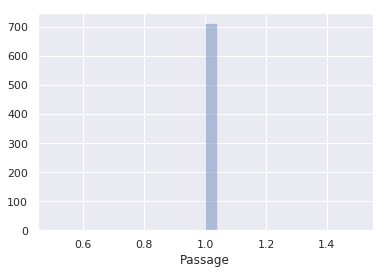

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

sns.distplot(passages, kde=False)

In [61]:
len(gi.index)

1582

In [62]:
gi.dropna()

,DATE,DATE.1,IMAGE ID,INDIVIDUAL,CORRIDOR,CAMERA,HOUR,SEX,DIRECTION,Direction (numerical),...,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
416,2016-08-22,augusti,IMG_2346,ROGER,2.0,C,10.0,M,OUT,0.0,...,1,1,"6 OTHERS ""ALONG""",0.8,20.0,1010.0,80.0,2.4,50.0,2016-08-22
423,2016-08-22,augusti,IMG_1313,ROGER,2.0,B,14.0,M,IN,1.0,...,1,1,SNIFFING CAMERA. MANY GOOD CLOSE UPS.,0.8,20.0,1010.0,80.0,2.4,50.0,2016-08-22
643,2017-01-10,januari,IMG_1667,HJÄRTA,2.0,B,8.0,M,IN,1.0,...,1,1,MÅNGA BILDER,0.9,21.0,1020.0,60.0,4.3,10.0,2017-01-10


KeyError: 'Passage'

In [8]:
gi.groupby('DATE.1').sum()

,CORRIDOR,HOUR,Direction (numerical),GROUP SIZE,CAMERA TEMPERATURE,MOONPHASE,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE
DATE.1,,,,,,,,,,,,
april,95.0,549.0,9.0,75.0,975.0,169.0,50.4,2372.0,112590.0,8410.0,347.6,6650.0
augusti,149.0,844.0,26.0,225.0,1666.0,401.0,71.4,2714.0,141060.0,10080.0,356.4,8010.0
december,181.0,888.0,34.0,226.0,1810.0,362.0,66.4,2971.0,143640.0,9890.0,540.4,6440.0
februari,63.0,299.0,18.0,75.0,605.0,164.0,51.3,2181.0,96940.0,5940.0,391.4,3300.0
januari,77.0,357.0,17.0,68.0,836.0,212.0,62.0,2402.0,112610.0,6960.0,389.6,4480.0
juli,208.0,1315.0,39.0,361.0,2250.0,371.0,68.1,2980.0,161190.0,11510.0,390.6,9930.0
juni,96.0,731.0,21.0,62.0,1173.0,225.0,61.3,2188.0,113230.0,9190.0,238.6,7250.0
maj,30.0,246.0,6.0,58.0,506.0,98.0,50.0,2093.0,105300.0,8160.0,265.1,6350.0
mars,96.0,492.0,22.0,66.0,905.0,243.0,58.6,2536.0,114500.0,7520.0,397.7,5350.0


In [12]:
gi.groupby('DATE.1').mean()

,CORRIDOR,HOUR,Direction (numerical),GROUP SIZE,CAMERA TEMPERATURE,MOONPHASE,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE
DATE.1,,,,,,,,,,,,
april,2.021277,11.680851,0.264706,1.595745,20.744681,3.595745,0.454054,21.369369,1014.324324,75.765766,3.131532,59.909910
augusti,1.986667,11.253333,0.490566,3.000000,22.213333,5.346667,0.495833,18.847222,979.583333,70.000000,2.475000,55.625000
december,2.056818,10.090909,0.531250,2.568182,20.568182,4.113636,0.470922,21.070922,1018.723404,70.141844,3.832624,45.673759
februari,2.032258,9.645161,0.720000,2.419355,19.516129,5.290323,0.523469,22.255102,989.183673,60.612245,3.993878,33.673469
januari,2.026316,9.394737,0.459459,1.789474,22.000000,5.578947,0.558559,21.639640,1014.504505,62.702703,3.509910,40.360360
juli,2.019417,12.766990,0.520000,3.471154,21.844660,3.601942,0.425625,18.625000,1007.437500,71.937500,2.441250,62.062500
juni,1.920000,14.620000,0.500000,1.240000,23.460000,4.500000,0.523932,18.700855,967.777778,78.547009,2.039316,61.965812
maj,1.363636,11.181818,0.500000,2.636364,23.000000,4.454545,0.480769,20.125000,1012.500000,78.461538,2.549038,61.057692
mars,1.920000,9.840000,0.564103,1.320000,18.100000,4.860000,0.518584,22.442478,1013.274336,66.548673,3.519469,47.345133


Text(0.5, 0, '')

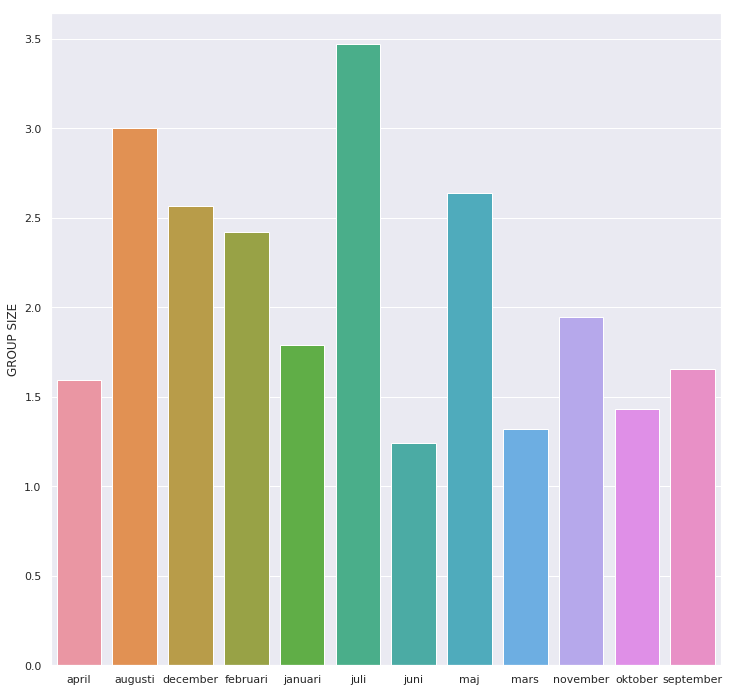

In [60]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(gi.groupby('DATE.1').mean().index, gi.groupby('DATE.1').mean()['GROUP SIZE'])
ax.set_xlabel('')

In [10]:
we = pd.read_excel('weather.xlsx')

In [11]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 23,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,18.0,12.0,11.0,10.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,18.0,13.0,11.0,10.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,18.0,14.0,11.0,10.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,18.0,15.0,11.0,10.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,18.0,16.0,12.0,10.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [13]:
rain = pd.read_excel('rain.xlsx')

In [14]:
rain.head()

,Date,Weather ID,Weather Description,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2015-01-01 00:00:00 +0000 UTC,800,Sky is Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00 +0000 UTC,800,Sky is Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00 +0000 UTC,800,Sky is Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 03:00:00 +0000 UTC,800,Sky is Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 04:00:00 +0000 UTC,800,Sky is Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
we_json = pd.read_json('weather_nanyuki_owm.json')

ValueError: Expected object or value

In [3]:
gi_raw = pd.read_excel('giraffe_raw.xlsx')

KeyboardInterrupt: 